# Jupyter Notebook for reading and processing GPR data

### Part 2: volume interpolation on  a map


### TASK:

Interpolate GPR volumes as map of reflectivity at different depth levels

### WORKFLOW: 

(1) Read volumes created with the previous JNotebook

(1.1) Plot single traces
 
(1.2) Plot complete raw data file (all traces)

(2) Get intensity of the signal as square of the signal amplitude

(3) Interpolate GPR data on a map at different depth-levels


### Import libraries

In [1]:
# Per la gestione dei file
import sys
import os
import glob

# Per il calcolo numerico
import numpy as np
from scipy import signal
from numpy import loadtxt
from scipy.interpolate import griddata


# Per la presentazione grafica dei risultati
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# Per l'analisi dei dati SEGY
import obspy
from obspy.io.segy.core import _read_segy

# Per le parti interattive del Notebook
from ipywidgets import interact, Layout
import ipywidgets as widgets

#Per visualizzare immagini
from IPython.display import Image
import matplotlib.image as image 



### (1) Select the GPR volumes created and the channel

In [2]:
#
# Variables  used in  the analysis 
#
##############################################################################################
#################################    EDIT HERE    ############################################
#
# Year of the fieldwork  (2021, 2023, 2024)
LIST_of_YEARS=["2021","2023"]   
N_of_YEARS=len(LIST_of_YEARS)
# RESOLUTION
RES="LOW"                              # LOW: lower frequency; HIGH: higher frequency
#
#############################################################################################
#############################################################################################


# Input parameters for GPR
if RES == "HIGH":
    Time_range = 50                                      # Short window  to increase resol
else:
    Time_range = 100                                     # Long window to investigate deeper
NPTS=1024                                                # Numero di campioni per traccia
dt=Time_range/NPTS                                       # Conversion ns/sample
INDIR='input/'                                           # Directory for original GPR files

# Directory for archiving results
OUTDIR='output/'                           # Directory for archiving output

# List files for the selected years
ALL_VOLUMES = []
ALL_FB = []
for YEAR in LIST_of_YEARS:
    if YEAR == "2021":
        if RES == "LOW":
            CHANNEL="1"
        else:
            CHANNEL="2"
    if YEAR == "2023":
        if RES == "LOW":
            CHANNEL="2"
        else:
            CHANNEL="1"        
    if YEAR == "2024":
        if RES == "LOW":
            CHANNEL="1"                       
        else:
            CHANNEL="2"       

    dir_path = INDIR + YEAR + '_*_' + CHANNEL + '.volume' 
    res = sorted(glob.glob(dir_path))
    for vol_file in res:
        ALL_VOLUMES.append(vol_file)
    dir_path = INDIR + YEAR + '_*_' + CHANNEL + '.t_first_break' 
    res = sorted(glob.glob(dir_path))
    for vol_file in res:
        ALL_FB.append(vol_file)

    
N_VOLUMES=len(ALL_VOLUMES)



print(" --> Working on years: ", LIST_of_YEARS)
print(" --> Found: ", N_VOLUMES, ' GPR pre-processed volumes ')
print(" --> Volumes: ", ALL_VOLUMES)
print(" --> First Break: ", ALL_FB)

if len(ALL_FB) != len(ALL_VOLUMES):
    print("\n\n >>>>> ERROR:: the number of files in the two lists is different\n\n")

 --> Working on years:  ['2021', '2023']
 --> Found:  28  GPR pre-processed volumes 
 --> Volumes:  ['input/2021_0109_1.volume', 'input/2021_0110_1.volume', 'input/2021_0111_1.volume', 'input/2021_0112_1.volume', 'input/2021_0113_1.volume', 'input/2021_0114_1.volume', 'input/2021_0115_1.volume', 'input/2021_0116_1.volume', 'input/2023_0007_2.volume', 'input/2023_0008_2.volume', 'input/2023_0009_2.volume', 'input/2023_0010_2.volume', 'input/2023_0011_2.volume', 'input/2023_0012_2.volume', 'input/2023_0013_2.volume', 'input/2023_0014_2.volume', 'input/2023_0015_2.volume', 'input/2023_0016_2.volume', 'input/2023_0017_2.volume', 'input/2023_0018_2.volume', 'input/2023_0019_2.volume', 'input/2023_0020_2.volume', 'input/2023_0021_2.volume', 'input/2023_0022_2.volume', 'input/2023_0023_2.volume', 'input/2023_0024_2.volume', 'input/2023_0025_2.volume', 'input/2023_0026_2.volume']
 --> First Break:  ['input/2021_0109_1.t_first_break', 'input/2021_0110_1.t_first_break', 'input/2021_0111_1.t_firs

# WORKFLOW

## (1) Read volumes created with the previous JNotebook

In [3]:

i=0
while i < N_VOLUMES:
    
    GPR_file = ALL_FB[i]
    print(' MARKER from FILE: ', GPR_file)
    GPRfile = open(GPR_file, "r")
    linestoken=GPRfile.readlines()
    for x in linestoken:
        t_marker=int(float(x.split()[0]))
    #print(GPR_file,t_marker)
    GPR_file = ALL_VOLUMES[i]
    print(' ADDING FILE: ', GPR_file)
    GPRfile = open(GPR_file, "r")
    ntraces = len(open(GPR_file).readlines(  ))
    print(' Found: ', ntraces, ' traces in the Volume ...')
    lines = np.zeros((NPTS, ntraces))
    lines = loadtxt(GPR_file)
    if i == 0:
        mtraces=lines
    else:
        mtraces0=np.concatenate((mtraces,lines),axis=0)
        mtraces=mtraces0
        
    i+=1
    
    
ntraces_tot=len(mtraces)
print('\n FINAL VOLUME IS COMPOSED BY ', ntraces_tot, ' traces') 


 MARKER from FILE:  input/2021_0109_1.t_first_break
 ADDING FILE:  input/2021_0109_1.volume
 Found:  19626  traces in the Volume ...
 MARKER from FILE:  input/2021_0110_1.t_first_break
 ADDING FILE:  input/2021_0110_1.volume
 Found:  13124  traces in the Volume ...
 MARKER from FILE:  input/2021_0111_1.t_first_break
 ADDING FILE:  input/2021_0111_1.volume
 Found:  19817  traces in the Volume ...
 MARKER from FILE:  input/2021_0112_1.t_first_break
 ADDING FILE:  input/2021_0112_1.volume
 Found:  19922  traces in the Volume ...
 MARKER from FILE:  input/2021_0113_1.t_first_break
 ADDING FILE:  input/2021_0113_1.volume
 Found:  6775  traces in the Volume ...
 MARKER from FILE:  input/2021_0114_1.t_first_break
 ADDING FILE:  input/2021_0114_1.volume
 Found:  13411  traces in the Volume ...
 MARKER from FILE:  input/2021_0115_1.t_first_break
 ADDING FILE:  input/2021_0115_1.volume
 Found:  20281  traces in the Volume ...
 MARKER from FILE:  input/2021_0116_1.t_first_break
 ADDING FILE:  inp

### (1.1) Plot single traces

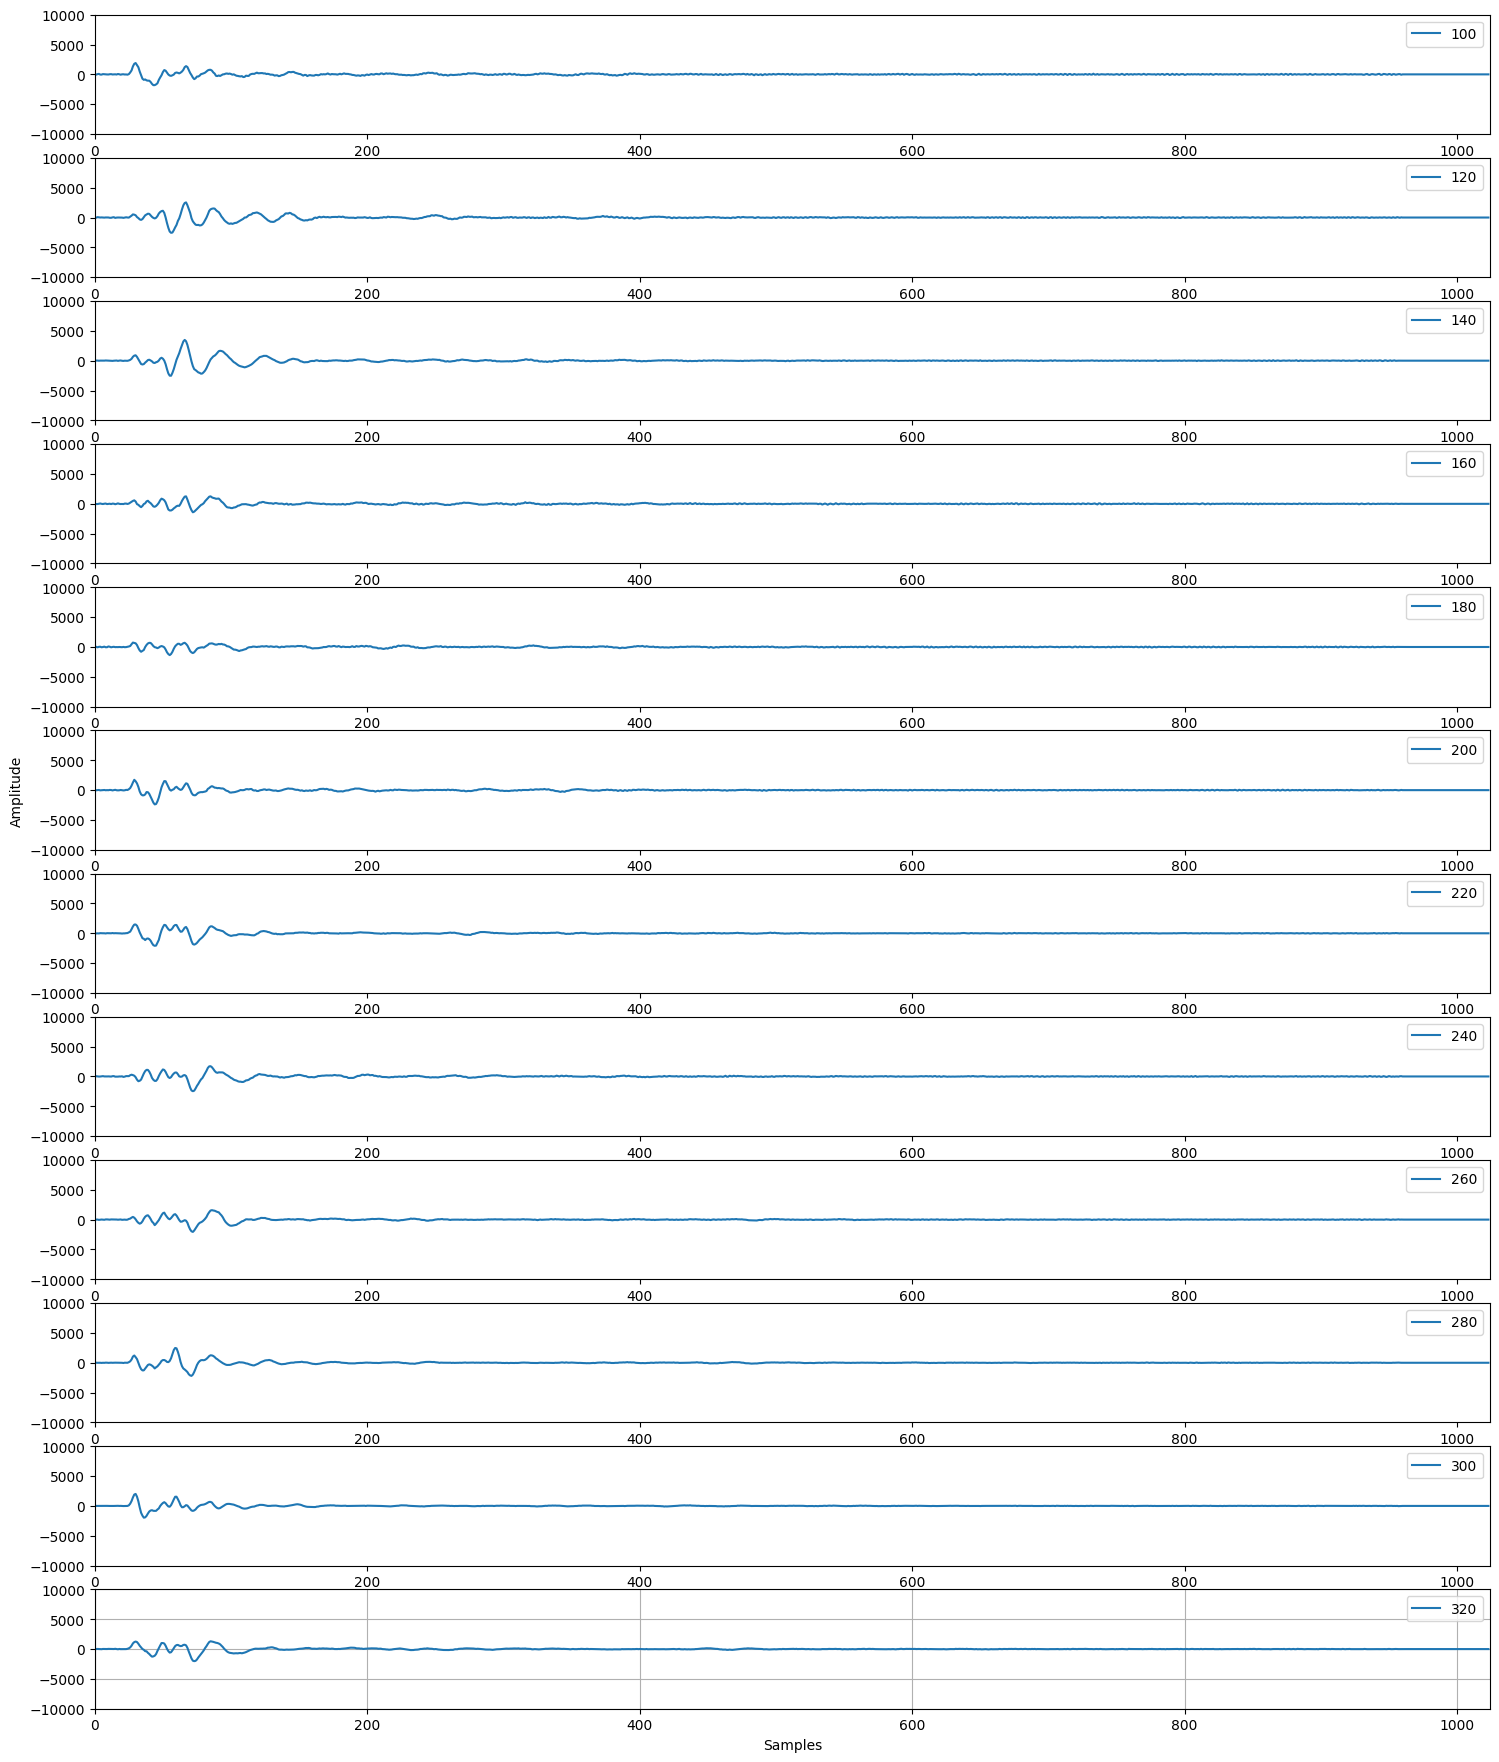

In [4]:

traces = []; trace_no=0
start_trace=100; trace_inc = 20; num_traces = 12
ylim = [-10000,10000]; xlim=[0,NPTS]

for index in np.arange(num_traces):
    traces.append(mtraces[start_trace+index*trace_inc,4:])
    #traces.append(data_stream[0].traces[start_trace+trace_inc*index].data)
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12) = plt.subplots(12,figsize=(18,22))
ax1.plot(traces[trace_no],label=start_trace+trace_no*trace_inc); ax1.legend(loc='upper right');ax1.set_ylim(ylim); ax1.set_xlim(xlim); trace_no+=1
ax2.plot(traces[trace_no],label=start_trace+trace_no*trace_inc); ax2.legend(loc='upper right'); ax2.set_ylim(ylim); ax2.set_xlim(xlim); trace_no+=1
ax3.plot(traces[trace_no],label=start_trace+trace_no*trace_inc); ax3.legend(loc='upper right'); ax3.set_ylim(ylim); ax3.set_xlim(xlim); trace_no+=1
ax4.plot(traces[trace_no],label=start_trace+trace_no*trace_inc); ax4.legend(loc='upper right'); ax4.set_ylim(ylim); ax4.set_xlim(xlim); trace_no+=1
ax5.plot(traces[trace_no],label=start_trace+trace_no*trace_inc); ax5.legend(loc='upper right'); ax5.set_ylim(ylim); ax5.set_xlim(xlim); trace_no+=1
ax6.plot(traces[trace_no],label=start_trace+trace_no*trace_inc); ax6.legend(loc='upper right'); ax6.set_ylim(ylim); ax6.set_xlim(xlim); trace_no+=1
ax6.set_ylabel('Amplitude')
ax7.plot(traces[trace_no],label=start_trace+trace_no*trace_inc); ax7.legend(loc='upper right'); ax7.set_ylim(ylim); ax7.set_xlim(xlim); trace_no+=1
ax8.plot(traces[trace_no],label=start_trace+trace_no*trace_inc); ax8.legend(loc='upper right'); ax8.set_ylim(ylim); ax8.set_xlim(xlim); trace_no+=1
ax9.plot(traces[trace_no],label=start_trace+trace_no*trace_inc); ax9.legend(loc='upper right'); ax9.set_ylim(ylim); ax9.set_xlim(xlim); trace_no+=1
ax10.plot(traces[trace_no],label=start_trace+trace_no*trace_inc); ax10.legend(loc='upper right'); ax10.set_ylim(ylim); ax10.set_xlim(xlim); trace_no+=1
ax11.plot(traces[trace_no],label=start_trace+trace_no*trace_inc); ax11.legend(loc='upper right'); ax11.set_ylim(ylim); ax11.set_xlim(xlim); trace_no+=1
ax12.plot(traces[trace_no],label=start_trace+trace_no*trace_inc); ax12.legend(loc='upper right'); ax12.set_ylim(ylim); ax12.set_xlim(xlim); trace_no+=1
ax12.set_xlabel('Samples');ax12.grid()
plt.show()


### (1.2) Plot complete raw data file (all traces)

The 99th percentile is 49.2068; the max amplitude is 922.0324; the standard deviation is  389.0246


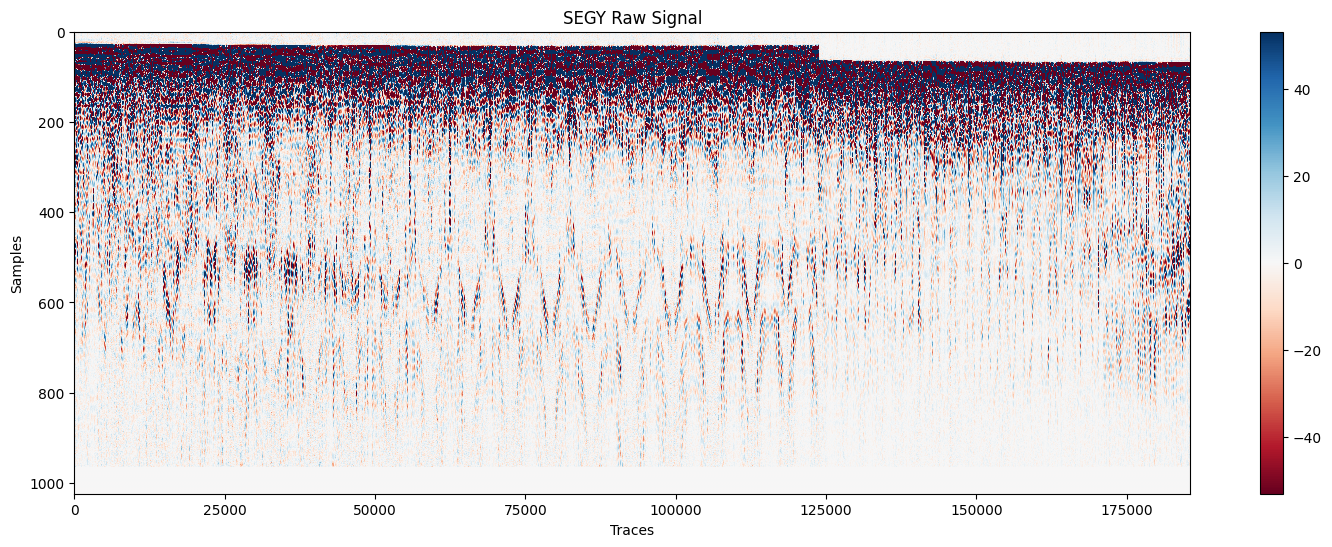

In [8]:

raw_data = mtraces[4:,].T

vm0 = np.percentile(raw_data, 90)
std0 = np.std(raw_data)
print("The 99th percentile is {:.4f}; the max amplitude is {:.4f}; the standard deviation is  {:.4f}".format(vm0, raw_data[0].max(),std0))

plt.figure(figsize=(18,6))
mystery_event = plt.imshow(raw_data, cmap="RdBu", vmin=-vm0-0.01*std0, vmax=vm0+0.01*std0, aspect='auto')
plt.xlim(0,ntraces_tot)
plt.ylim(1024,0)

plt.colorbar(mystery_event)
plt.xlabel('Traces')
plt.ylabel('Samples')
plt.title('SEGY Raw Signal')
plt.show()

## (2) Get intensity of the signal as square of the signal amplitude

In [ ]:

raw_data = np.square(mtraces[4:,].T)

vm0 = np.percentile(raw_data, 60)
std0 = np.std(raw_data)
print("The 99th percentile is {:.4f}; the max amplitude is {:.4f}; the standard deviation is  {:.4f}".format(vm0, raw_data[0].max(),std0))

plt.figure(figsize=(18,6))
mystery_event = plt.imshow(raw_data, cmap="gray_r", vmin=0, vmax=vm0+0.001*std0, aspect='auto')
plt.xlim(0,ntraces_tot)
plt.ylim(1024,0)

plt.colorbar(mystery_event)
plt.xlabel('Traces')
plt.ylabel('Samples')
plt.title('SEGY Raw Signal')
plt.show()

## (3) Remove first break samples to compare different fieldwork data

In [11]:

i=0
while i < N_VOLUMES:
    
    GPR_file = ALL_FB[i]
    print(' MARKER from FILE: ', GPR_file)
    GPRfile = open(GPR_file, "r")
    linestoken=GPRfile.readlines()
    for x in linestoken:
        t_marker=int(float(x.split()[0]))
    print(GPR_file,t_marker)
    shift=100-t_marker
    GPR_file = ALL_VOLUMES[i]
    print(' ADDING FILE: ', GPR_file)
    GPRfile = open(GPR_file, "r")
    ntraces = len(open(GPR_file).readlines(  ))
    print(' Found: ', ntraces, ' traces in the Volume ...')
    lines0 = np.zeros((NPTS, ntraces))
    lines0 = loadtxt(GPR_file)
    NPTS0, ntraces = np.shape(lines0)
    lines = np.zeros((NPTS0,ntraces))
    ic=0
    while ic < NPTS :
        ic_new=ic+t_marker
        if ic < 4:
            lines[:,ic]=lines0[:,ic]
        else:
            if ic_new < 1028:
                lines[:,ic]=lines0[:,ic_new]
            else:
                lines[:,ic]=0.0
        ic+=1
    if i == 0:
        mtraces_corrected=lines
    else:
        mtraces0=np.concatenate((mtraces_corrected,lines),axis=0)
        mtraces_corrected=mtraces0
        
    i+=1
    
ntraces_tot=len(mtraces_corrected)
print('\n FINAL VOLUME IS COMPOSED BY ', ntraces_tot, ' traces') 




 MARKER from FILE:  input/2021_0109_1.t_first_break
input/2021_0109_1.t_first_break 23
 ADDING FILE:  input/2021_0109_1.volume
 Found:  19626  traces in the Volume ...
 MARKER from FILE:  input/2021_0110_1.t_first_break
input/2021_0110_1.t_first_break 23
 ADDING FILE:  input/2021_0110_1.volume
 Found:  13124  traces in the Volume ...
 MARKER from FILE:  input/2021_0111_1.t_first_break
input/2021_0111_1.t_first_break 23
 ADDING FILE:  input/2021_0111_1.volume
 Found:  19817  traces in the Volume ...
 MARKER from FILE:  input/2021_0112_1.t_first_break
input/2021_0112_1.t_first_break 23
 ADDING FILE:  input/2021_0112_1.volume
 Found:  19922  traces in the Volume ...
 MARKER from FILE:  input/2021_0113_1.t_first_break
input/2021_0113_1.t_first_break 23
 ADDING FILE:  input/2021_0113_1.volume
 Found:  6775  traces in the Volume ...
 MARKER from FILE:  input/2021_0114_1.t_first_break
input/2021_0114_1.t_first_break 23
 ADDING FILE:  input/2021_0114_1.volume
 Found:  13411  traces in the Volu

### (3.1) Plot complete raw data files aligned (all traces)

The 99th percentile is 48.9571; the max amplitude is 922.0324; the standard deviation is  389.0071


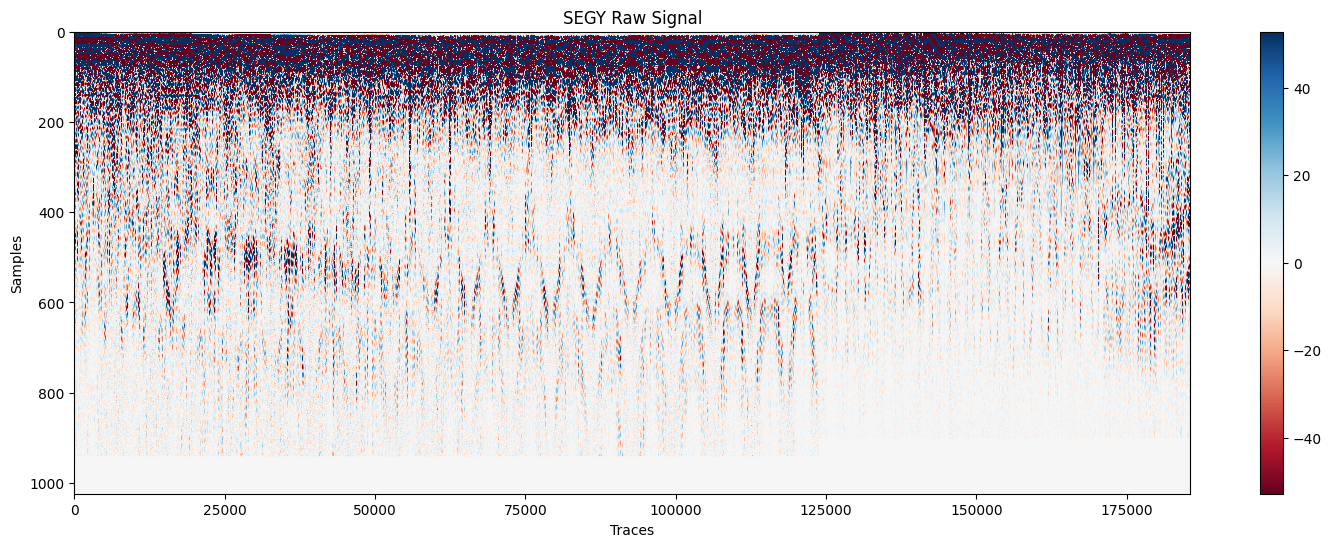

In [12]:
raw_data = mtraces_corrected[4:,].T

vm0 = np.percentile(raw_data, 90)
std0 = np.std(raw_data)
print("The 99th percentile is {:.4f}; the max amplitude is {:.4f}; the standard deviation is  {:.4f}".format(vm0, raw_data[0].max(),std0))

plt.figure(figsize=(18,6))
mystery_event = plt.imshow(raw_data, cmap="RdBu", vmin=-vm0-0.01*std0, vmax=vm0+0.01*std0, aspect='auto')
plt.xlim(0,ntraces_tot)
plt.ylim(1024,0)

plt.colorbar(mystery_event)
plt.xlabel('Traces')
plt.ylabel('Samples')
plt.title('SEGY Raw Signal')
plt.show()

## (4) Interpolate GPR data on a map at different depth-levels

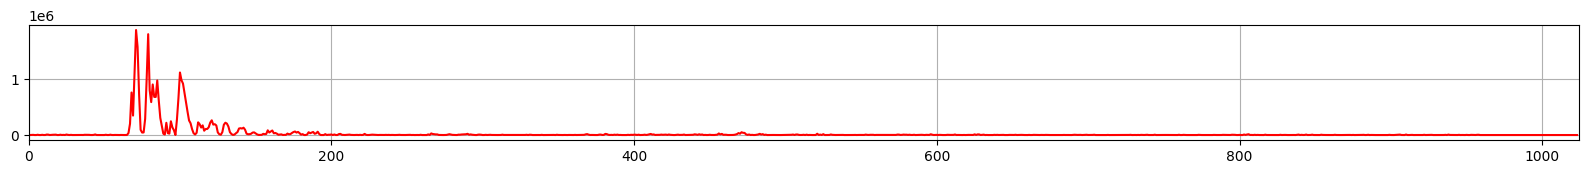

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='Intensity:', layout=Layout(…

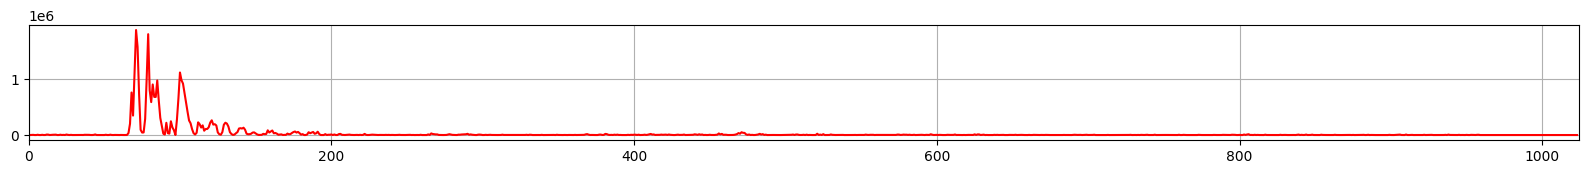

In [15]:
raw_data=np.square(mtraces_corrected[:,4:])
geom_data=mtraces_corrected[:,0:2]
vm0 = np.percentile(raw_data, 90)
std0 = np.std(raw_data)


#
# DEFINE SOUNDING AREA
xmin=min(geom_data[:,0])
xmax=max(geom_data[:,0])
ymin=min(geom_data[:,1])
ymax=max(geom_data[:,1])
xc=geom_data[:,0]
yc=geom_data[:,1]
#print(xmin,xmax,ymin,ymax)
#

#
# DEFINE CONSTANTS
perm=0.09            # m/ns -- to convert TWT in depth
t_first_break=0      # in samples. Traces have been aligned to First-break sample.   
#


@interact(intens=widgets.FloatSlider(value=0.5,min=0.1,max=0.99,step=0.01, description='Intensity:', 
                                        layout=Layout(width='90%',height='20px'), continuous_update=False),
          nsample=widgets.IntSlider(value=1,min=1,max=1024,step=1, description='Sample:', 
                                        layout=Layout(width='90%',height='20px'), continuous_update=False),
          width=widgets.IntSlider(value=5,min=1,max=200,step=1, description='Width:', 
                                        layout=Layout(width='90%',height='20px'), continuous_update=False))

def npa_map(intens=80,nsample=26,width=5):

    vm0 = np.percentile(raw_data, intens)
    depth=0.5 * perm * dt * (nsample-t_first_break)
    
   
    # Single values (energy)
    s0=np.arange(nsample,nsample+width,1)
    zc0 = np.zeros((ntraces_tot, width))
    zc1 = []
    zc = []
    
    
    zc0[:] = np.square(mtraces[:,nsample:nsample+width])
    
    zc1=np.square(mtraces[ntraces_tot-1,4:])
    start_sample=nsample-int(width/2)
    end_sample=nsample+int(width/2)
    zc2=mtraces_corrected[ntraces_tot-1,nsample-int(width/2):nsample+int(width/2)+1]
    
    zc = zc0.mean(1)
    
    vm0 = np.percentile(zc, 90)
    std0 = np.std(zc)
    print("The 99th percentile is {:.4f}; the max amplitude is {:.4f}; the standard deviation is  {:.4f}".format(vm0, raw_data[0].max(),std0))

    
    # Interpolate values on a map (200x200)
    grid_x, grid_y = np.mgrid[xmin:xmax:200j, ymin:ymax:200j]
    points = geom_data
    values = zc0.mean(1)
    grid_z = griddata(points, values, (grid_x, grid_y), method='cubic')
    
    print('\nGPR data-point: ', nsample, ' (+', width,') migrated to depth:', depth, ' meters (using permittivity: ', perm, ' m/ns)')

    plt.figure(figsize=(20, 1.5))
    plt.xlim(0,1024)
    plt.grid()
    plt.plot(zc1,'r-',label='Trace: ' + str(ntraces_tot))
    plt.plot(s0,zc2,'X', markersize=12, color='red',label='Integrated data-points')
    plt.legend(loc='upper right')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    #plt.show()
 

    im = plt.imread("img/monte_barro_GPR_area.jpg")
    aspect = im.shape[0] / im.shape[1] * (xmax - xmin)/(ymax - ymin)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))
    ax1.set_xlim(xmin,xmax)
    ax1.set_ylim(ymin,ymax)
    ax1.grid()
    ax1.scatter(xc, yc, s=10, c=zc, vmin=0, vmax=vm0+0.01*std0, cmap='gray_r')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    
    ax2.set_xlim(xmin,xmax)
    ax2.set_ylim(ymin,ymax)
    ax2.grid()
    ax2.plot(xc, yc,'X', markersize=0.25)
    ax2.imshow(grid_z.T, cmap='RdBu_r', vmin=0, vmax=vm0+0.01*std0, extent=(xmin,xmax,ymax,ymin))
    levels = [intens*(vm0+0.01*std0),vm0+0.01*std0]
    ax2.contour(grid_z.T, levels, colors='red', extent=(xmin,xmax,ymin,ymax))
    ax2.set_xlabel('X')
    
    ax3.imshow(im, zorder=0, extent=[xmin, xmax, ymin, ymax], aspect=aspect)
    
    #plt.show()
    
    

    
        

#### Relevant websites

https://emanuelhuber.github.io/RGPR/

https://seg.org/Portals/0/SEG/News%20and%20Resources/Technical%20Standards/seg_y_rev2_0-mar2017.pdf

https://www.delftstack.com/howto/python/read-binary-files-in-python/

https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html

https://plotly.com/python/3d-volume-plots/
https://plotly.com/python/visualizing-mri-volume-slices/

https://www.datacamp.com/community/tutorials/matplotlib-3d-volumetric-data